In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
df=pd.read_csv('TSLA.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-05-12,42.287998,42.334000,40.731998,41.456001,41.456001,18252500
1,2016-05-13,41.556000,42.240002,41.340000,41.521999,41.521999,14114000
2,2016-05-16,41.630001,42.630001,41.584000,41.658001,41.658001,14747000
3,2016-05-17,41.810001,41.964001,40.804001,40.931999,40.931999,14218000
4,2016-05-18,41.830002,43.062000,41.549999,42.234001,42.234001,28087500


In [4]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,151.827199,155.257059,148.020668,151.893451,151.893451,4.429620e+07
std,201.985494,206.634490,196.415051,201.972000,201.972000,3.057539e+07
min,36.220001,36.945999,35.397999,35.793999,35.793999,8.297500e+06
25%,51.002499,51.666999,50.036999,50.960001,50.960001,2.459650e+07
50%,63.959000,65.149997,62.941999,64.195004,64.195004,3.498640e+07
75%,108.738499,110.979002,103.131001,107.783498,107.783498,5.227275e+07
max,891.380005,900.400024,871.599976,883.090027,883.090027,3.046940e+08


There are abundant columns, so I will only focus on Close column.

In [5]:
df['Close'].describe()

count    1258.000000
mean      151.893451
std       201.972000
min        35.793999
25%        50.960001
50%        64.195004
75%       107.783498
max       883.090027
Name: Close, dtype: float64

I will explain something about the information above. I have 505 observations in this dataset in two years that make sense because the market closes on Saturday and Sunday.
The min was only 35 compare to the max was 883, which means Tesla is overgrowing. The Standard Deviation was huge, which means it volatility asset (a very risky asset).
The median was 160 compare to the max.  The skewness is coming from the fact that in the last year, we see that Tesla's price has moved from 160 to 883. This dataset is hugely skewed.

The important thing in finance or investment is the Return. The Return is the percentage change, and I will calculate the Return using "Adj Close" columns.

In [6]:
df['Return']=df['Adj Close'].pct_change()

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Return
0,2016-05-12,42.287998,42.334000,40.731998,41.456001,41.456001,18252500,NaN
1,2016-05-13,41.556000,42.240002,41.340000,41.521999,41.521999,14114000,0.001592
2,2016-05-16,41.630001,42.630001,41.584000,41.658001,41.658001,14747000,0.003275
3,2016-05-17,41.810001,41.964001,40.804001,40.931999,40.931999,14218000,-0.017428
4,2016-05-18,41.830002,43.062000,41.549999,42.234001,42.234001,28087500,0.031809


In [8]:
df.isna().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Return       1
dtype: int64

In [9]:
df.set_index('Date', inplace=True)

Let's do some visualization to make the data more transparent.

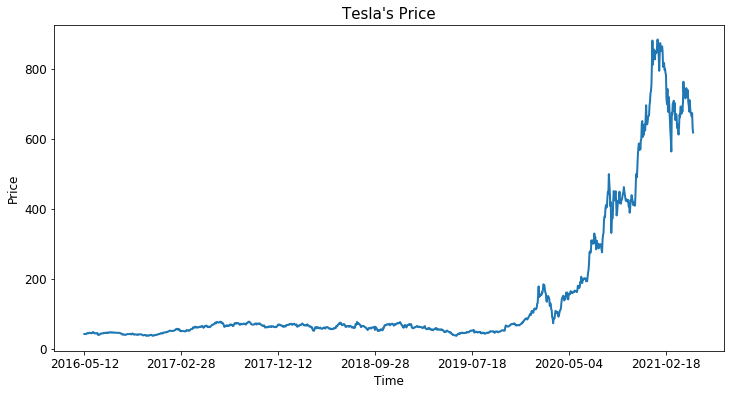

In [10]:
df['Close'].plot(figsize=(12,6), linewidth=2, fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xlabel('Time', fontsize=12)
plt.title("Tesla's Price", fontsize=15)
plt.show()

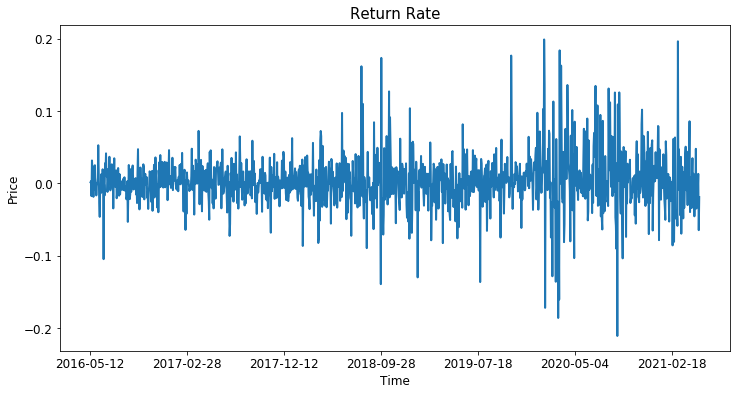

In [11]:
df['Return'].plot(style=['-'],figsize=(12,6), linewidth=2, fontsize=12 )
plt.ylabel('Price', fontsize=12)
plt.xlabel('Time',fontsize=12)
plt.title('Return Rate', fontsize=15)
plt.show()

Next step, I will only keep 'Date' and 'Close' columns to put in the ARIMA model.

In [12]:
price=pd.DataFrame(df['Close'])

In [13]:
price.head()

,Close
Date,
2016-05-12,41.456001
2016-05-13,41.521999
2016-05-16,41.658001
2016-05-17,40.931999
2016-05-18,42.234001



# Decomposition

We can see there is a mix upward and downward trend in our price. We can use statsmodels to perform a decomposition of this time series.With statsmodels we will be able to see the trend, seasonal, and residual components of our data.

In [14]:
# import seasonal_decompose
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(price, period=30)

# Gather the trend, seasonality and noise of decomposed object
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

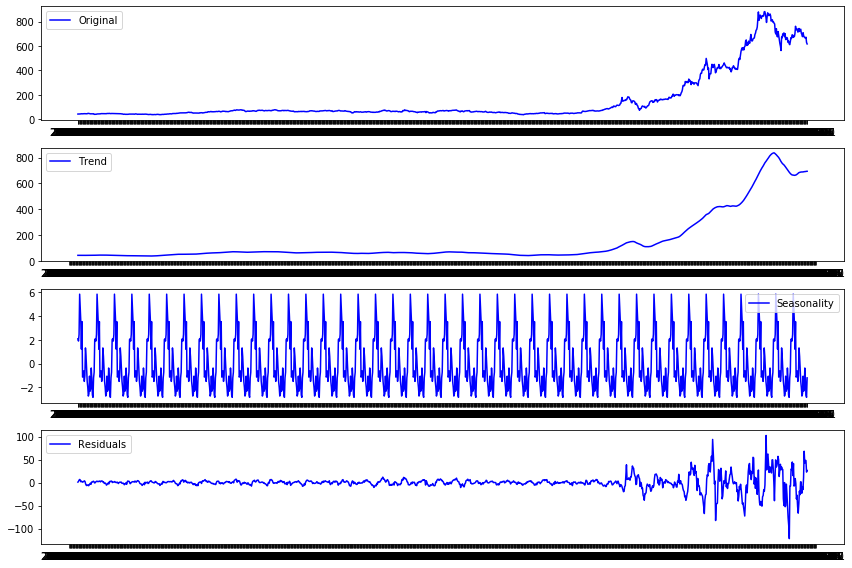

In [15]:
# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.subplot(411)
plt.plot(price, label='Original', color="blue")
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend', color="blue")
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color="blue")
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals', color="blue")
plt.legend(loc='best')
plt.tight_layout()

This data set is not stationary, there are various ways to make it stationary. However, we have auto ARIMA which will help me to skip define q d p.

In [17]:
#save data for auto ARIMA
price.to_csv('tesla_clean.csv')